In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from bbl import *

In [34]:
# Constant parameters
g = 9.81
α = 2e-4
Γ = 0.0008613659531090722
N = np.sqrt(g*α*Γ)
θ = 1.26E-3
f = -5.3e-5

h = 230.
k0 = 5.2e-5
k1 = 1.8e-3
σ = 1.

bbl0 = bbl_exp(k0, k1, h, N, f, θ, σ=σ)
bbl = bbl_exp(k0, k1, h, N, f, θ, σ=230*σ)
# bbl_transient = bbl_exp(
#     T = 10000*365*86400., dt=100*365*86400.,
#     k0=k0, k1=k1, h=h, N=N, f=f, θ=θ, σ=σ
# )

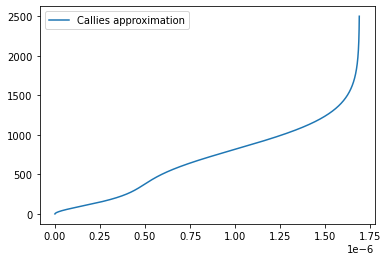

In [35]:
plt.plot(bbl['bz'], bbl['zf'], label='Callies approximation')
#plt.plot(bbl_transient['bz'], bbl_transient['zf'], label='Dedalus IVP')
plt.legend()

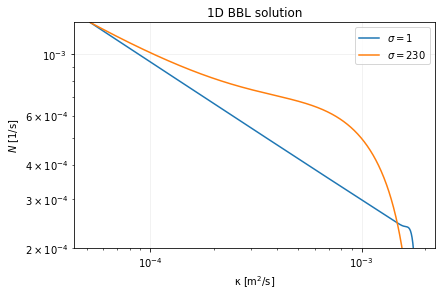

In [43]:
plt.loglog(k0+k1*np.exp(-bbl0["zf"]/h),np.sqrt(bbl0['bz']), "C0-", label=r'$\sigma=1$')
plt.loglog(k0+k1*np.exp(-bbl["zf"]/h),np.sqrt(bbl['bz']), "C1-", label=r'$\sigma=230$')
plt.ylabel(r"$N$ [1/s]")
plt.xlabel(r"κ [m$^2$/s]")
plt.tight_layout()
plt.ylim(2e-4, 1.3e-3)
plt.grid(True, alpha=0.2)
plt.title("1D BBL solution")
plt.legend()
plt.savefig("../../figures/BBL_scaling.png", bbox_inches="tight", dpi=200)